# MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits 0 to 9. Each image is of size 28*28 pixels. The images are grayscale, i.e, there is only one channel for images. Images are divided into 10 different classes (digits 0 t0 9). 
It consist of-
- 60000 training images
- 10000 test images
- 28*28 pixels


![Sample image of MNIST dataset](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/480px-MnistExamples.png "Sample image of MNIST dataset")

## Importing files

In [1]:
import numpy as np
# import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Using Gpu for Tensorflow

In [2]:
physical_devices = tf.config.experimental.list_physical_devices()
physical_devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
tf.config.experimental.set_memory_growth(physical_devices[2], True)

## Loading Data

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

## Data Visualization

[]

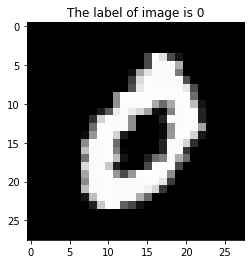

In [6]:
x=37
plt.title("The label of image is "+str(y_train[x]))
plt.imshow(X_train[x], cmap='gray')
plt.plot()

## Flattening and normalizing images

Now for Convolution layers we have to reshape our input into a single tenor. That's because the first convolution
expects a single tensor containing everything, so instead of 60,000 items (size = 28x28x1) in a list, we have a single
4D list that is 60,000x28x28x1.

In [7]:
input_shape = (28,28,1)
X_train = X_train.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
X_test = X_test.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0

## Converting to 1 vs all digits

Our task is to classify the digit 1 from all given digits(0-9). So if the image is of calss 1 then its class will be 1 and all the other classes/digits(0, 2-9) are classified as "not 1", or 0 class.

In [8]:
y_train, y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [9]:
def change(x):
    if(x==1):
        return 1
    return 0
# This function takes as input the class/digit from MNIST, if the digit is one then it return one otherwise it returns 0.

y_train = np.array(list(map(change, y_train)), dtype=np.uint8)
y_test = np.array(list(map(change, y_test)), dtype=np.uint8)

In [10]:
y_train, y_test

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 1, ..., 0, 0, 0], dtype=uint8))

In [11]:
np.unique(y_train), np.unique(y_test)

(array([0, 1], dtype=uint8), array([0, 1], dtype=uint8))

## CNN Model building

Since now we have only 2 classes, so our task now is a binary classification task, which is the digit 1 vs all the other digits from 0 to 9.

In [12]:
def My_model(activation):
    
    # Model Building
    model = keras.Sequential([keras.Input(shape=input_shape), #(28,28,1)
                          keras.layers.Conv2D(32, (3,3), padding='valid', activation=activation),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, (3,3), padding='valid', activation=activation),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(128, (3,3), padding='valid', activation=activation),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(32, activation=activation),
                          keras.layers.Dense(4, activation=activation),
                          keras.layers.Dense(1, activation='sigmoid')])
    '''The model is made using 3 Convolution Layers with number of filters as 32, 64 and 128 in respective layers with max
       pooling layers of size (2,2) after each Convolution layer. Then there is a flatten layer to flatten the output from 
       last pooling layer to be passed to a dense network layer, because the dense layer accepts the input to it in a 
       flattened 1D manner. There are 3 dense layer after Flatten layer the first with 32 neuron units, second with 4 
       neuron units and last with 1 neuron unit. This dense layer is the output layer of this model. The output has only 1 
       neuron because the task is binary classification task where we need to classify digit 1 with all others. So if the
       last layer activates then it is the class/digit 1 otherwise it is the class 0(rest of the digits) .For this purpose,
       we are using activation function as "sigmoid" which will give output in range of 0 and 1, i.e, it can be considered
       as the probability of output of class 1. If the output is near 1 then the class is one and if the output is near 0
       then the class is 0(or the prediction probablitty of class 1 is near to 0).'''
    
    print(model.summary())
    
    # Compile
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])
    '''In this case we have used the loss function as Binary-Crossentropy because the task is a binary classification task.
    If it would have been a multi class classification task with more than 2 classes and the output "y_train" and "y_test" 
    aslo contains the classes in numerical form, then we would have used Sparse-Categorical-Crossenropy. And if it would
    have been in One Hot Encoded format then the loss function used would be Categorical-Crossentropy.'''
    
    print("*"*20+"Model.fit"+"*"*20)
    # Fit
    model.fit(X_train, y_train, batch_size=32, epochs=5)
    
    print("*"*20+"Model Evaluation"+"*"*20)
    # Evaluate
    eval = model.evaluate(X_test, y_test, batch_size=32)
    
    print("*"*55)
    print(f"The test score of model with {activation} activation function is:", eval[1])
    
    return model

## Trying out the model with different activation functions

### 1. Rectified Linear Unit (ReLU) Activation Function

In [13]:
model_relu = My_model(activation='relu')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

### 2. Tanh or hyperbolic tangent Activation Function

In [14]:
model_tanh = My_model(activation='tanh')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

### 3. Linear Activation Function

In [15]:
model_linear = My_model(activation='linear')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

### 4. Sigmoid or Logistic Activation Function

In [16]:
model_sigmoid= My_model(activation='sigmoid')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

### 5. Softmax Activation Function

In [17]:
model_softmax = My_model(activation='softmax')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

## Result Matrix

The results of using different activation function are:

| Activation Functions | Train Accuracy | Test Accuracy |
| :------------- | :----------: | -----------: |
| relu | 99.82%   | 98.83% |
| tanh | 99.78% | 99.85% |
| linear | 99.84% | 99.80% |
| sigmoid | 99.53% | 99.83% |
| softmax | 99.56% | 99.68% |

The results of all the activation functions are nearly similar when trained for 5 epochs, the results may change for different number of epochs. For now, we can use any of the model but I would like to go with model_tanh.

## Test it on our data
- We will use `opencv` library to resize and convert images and `glob` library to access all the images present in the folder "Handwritten_digits_Images".

In [18]:
import cv2
import glob

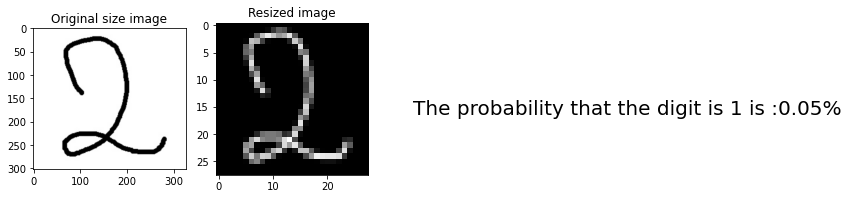

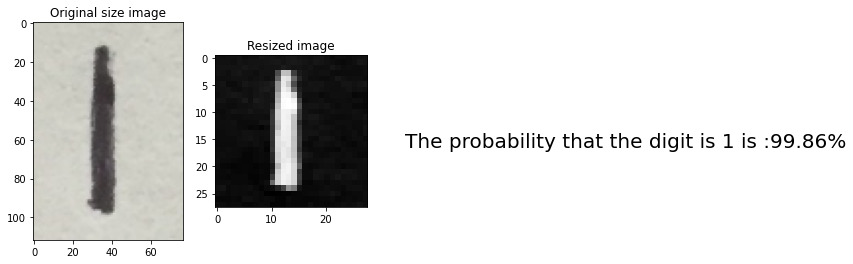

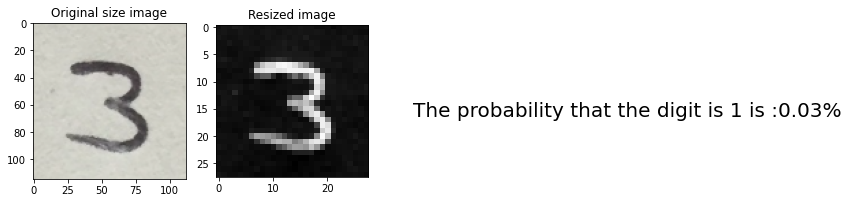

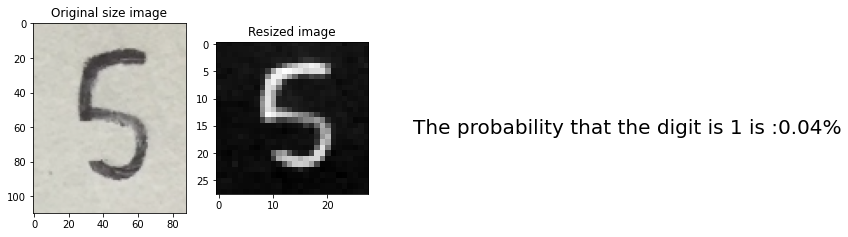

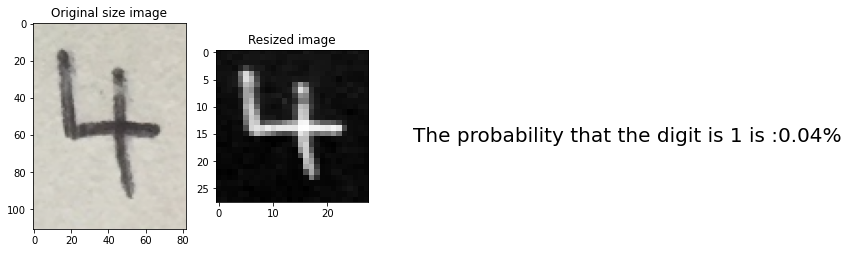

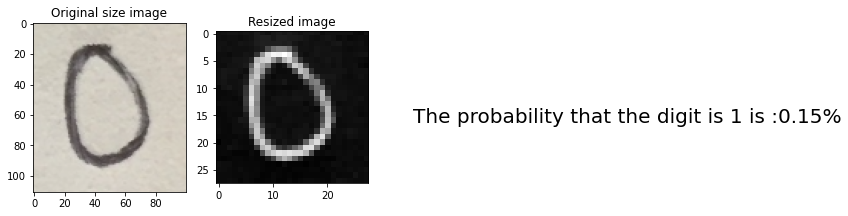

In [24]:
images = [cv2.imread(file) for file in glob.glob("Handwritten_digits_Images\*.png")]
# Here are iamges are read in a colored format (3 channels). By default the OpenCV library reads the images in BGR format.

for image in images:
    plt.figure()
    
    #Resizing image to the size of images of trainging dataset(MNIST)
    img = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
    # Using interpolation as INTER_AREA, to reduce the background noise.
    
    # The images in MNIST data are in one color channel, i.e, gray format where the background is pure black and the
    # digit is written in white. So we need to convert all of our test images into gray format. The function used is
    # cv2.COLOR_BGR2GRAY which will convert the image to 1 channel, i.e. gray.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Now our next task is to convert image background as black while digit as white pixels. Because the images in the 
    # MNIST data are in similar format where background is pure black without noise and the digits are in white colored 
    # pixles. Our images are currently in a fromat where background is white while digits are black, and we have to inverse
    # this. Subtracting every pixel from white pixle(255) will make white as black and black as white.
    img = 255 - img
    
    # Let's plot
    imgage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Matplotlib plots image in RGB format, while openCV uses BGR format.
    plt.subplot(1, 2, 1), plt.imshow(imgage), plt.title("Original size image")
    plt.subplot(1, 2, 2), plt.imshow(img, 'gray'), plt.title("Resized image")
    
    # Converting image into format that can be passed into our model for prediction.
    # This includes flaattenig of image as 1D image, converting as float32 then normalizing by dividing by 255.0
    img = img.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    
    # Prediction
    result = np.array(model_tanh.predict(img).reshape(-1))
    
    # Plotting the result
    format_float = "{:.2f}".format(result[0]*100)
    plt.suptitle(f"The probability that the digit is 1 is :{format_float}%", size=20, y=0.5, x=1.5)
plt.show()

- Here we can see that the actual image of 1 is classified as 1 with probability 99.86% while for other digits the probability is less than 1%.